In [2]:
import numpy as np
import pandas as pd
import os
import time
import gc
import random
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from keras.preprocessing import text, sequence
import torch
from torch import nn
from torch.utils import data
from torch.nn import functional as F
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import lightgbm as lgbm
sns.set(style="ticks")

Using TensorFlow backend.


In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [4]:
pd.set_option('display.max_columns', 500)
features = ['severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white',
       'publication_id', 'parent_id', 'article_id', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count']

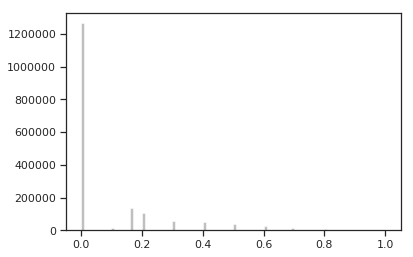

In [5]:
#histogram of target distributions
data = train["target"].values
num_bins = 100
n, bins, patches = plt.hist(data, num_bins, facecolor='grey', alpha=0.5)
plt.show()


In [6]:
#XGBoost feature importance
X = train[features]
Y = train["target"]

In [7]:
model = XGBClassifier()
model.fit(X, Y)

In [ ]:
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()